# Analysis of embeddings values

In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.data.experimental import cardinality
from tensorflow.data.experimental import AUTOTUNE

In [16]:
path_models = r'C:\Users\pitip\code\ClaireLeroux44\ArtRecognition\models\Full_training'
files = os.listdir(path_models)
models_list = [f for f in files if f.find('.')==-1]
print(models_list[:5])
len(models_list)

['20201211_171053_VGG16_v3_1', '20201211_181927_VGG16_v3_2', '20201211_194603_VGG16_v3_3', '20201211_194616_VGG16_v4_1', '20201211_202203_VGG16_v3_4']


49

In [17]:
dict_recap = []
for model in models_list:
    history = pd.read_csv(os.path.join(path_models, model+'.csv'))
    with open(os.path.join(path_models, model+'.txt')) as f:
        lines = f.readlines()
    
    emb_size_str = [s for s in lines if 'Embedding size' in s]
    emb_size = int(emb_size_str[0].replace('Embedding size:', '').replace('\n', ''))
    
    data_aug_str = [s for s in lines if 'With data augmentation' in s]
    data_aug = (data_aug_str[0].replace('With data augmentation:', '').replace('\n', '').strip()) == 'True'
    
    layer_str = [s for s in lines if 'Last layer activation' in s]
    layer = layer_str[0].replace('Last layer activation:', '').replace('\n', '').strip()
    
    patience_str = [s for s in lines if 'patience number' in s]
    patience = int(patience_str[0].replace('patience number:', '').replace('\n', ''))
    
    loss_str = [s for s in lines if 'Loss on test set' in s]
    loss = float(loss_str[0].replace('Loss on test set:', '').replace('\n', ''))
    
    accuracy_str = [s for s in lines if 'Accuracy on test set' in s]
    accuracy = float(accuracy_str[0].replace('Accuracy on test set:', '').replace('\n', ''))
    
    dict_recap.append({'name': model, 'Embedding_size': emb_size, 'Data_augmentation': data_aug, 'Last_layer_activation': layer, 
                 'patience' :patience, 'Final_test_loss': loss, 'Final_test_accuracy': accuracy, 'History': history, 'Final epoch number': len(history)})
log_df = pd.DataFrame(dict_recap)
log_df = log_df.sort_values('Final_test_accuracy', ascending = False)
log_df.head()

,name,Embedding_size,Data_augmentation,Last_layer_activation,patience,Final_test_loss,Final_test_accuracy,History,Final epoch number
38,20201212_205911_VGG16_v3_27,400,False,sigmoid,20,0.5387,0.8331,loss accuracy val_loss val_accuracy...,50
35,20201212_193432_VGG16_v4_11,100,False,sigmoid,50,0.5794,0.8165,loss accuracy val_loss val_accuracy...,70
15,20201212_042057_VGG16_v3_11,100,False,sigmoid,20,0.5792,0.8151,loss accuracy val_loss val_accuracy...,49
8,20201211_233723_VGG16_v4_3,50,False,sigmoid,50,0.6220,0.8036,loss accuracy val_loss val_accuracy...,76
2,20201211_194603_VGG16_v3_3,50,False,sigmoid,20,0.6489,0.8029,loss accuracy val_loss val_accuracy...,60


In [18]:
path_data_test = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test'
path_data_test = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small_1im'
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
test_dataset = image_dataset_from_directory(path_data_test, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='categorical')

class_names = test_dataset.class_names
n_artist = len(class_names)
#test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
print('Number of test batches: %d' % cardinality(test_dataset))

Found 10 files belonging to 1 classes.
Number of test batches: 1


In [19]:
%%time
#for model in models_list:
model = models_list[0]
trained_model = load_model(os.path.join(path_models, model))


Wall time: 1.59 s


In [20]:
layer_outputs = [trained_model.layers[-1].input]
embedding_model = models.Model(inputs=trained_model.input, outputs=layer_outputs)

In [21]:
image_embeddings = embedding_model.predict(test_dataset)
image_embeddings.shape

(10, 50)

<AxesSubplot:ylabel='Count'>

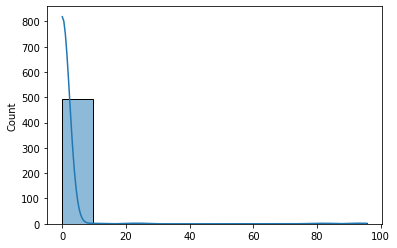

In [22]:
sns.histplot(image_embeddings.ravel(), kde=True)

In [23]:
act_fn = np.unique(log_df['Last_layer_activation'])
emb_size = np.unique(log_df['Embedding_size'])
pat = [20, 50]
DA = [False, True]
plt_symbol = ['+-', 'o-']

In [24]:
log_df.loc[log_df['name'] == model]

,name,Embedding_size,Data_augmentation,Last_layer_activation,patience,Final_test_loss,Final_test_accuracy,History,Final epoch number
0,20201211_171053_VGG16_v3_1,50,False,relu,20,1.5074,0.6345,loss accuracy val_loss val_accuracy...,30


Model 1/49
Model 2/49
Model 3/49
Model 4/49
Model 5/49
Model 6/49
Model 7/49
Model 8/49
Model 9/49
Model 10/49
Model 11/49
Model 12/49
Model 13/49
Model 14/49
Model 15/49
Model 16/49
Model 17/49
Model 18/49
Model 19/49
Model 20/49
Model 21/49
Model 22/49
Model 23/49
Model 24/49
Model 25/49
Model 26/49
Model 27/49
Model 28/49
Model 29/49
Model 30/49
Model 31/49
Model 32/49
Model 33/49
Model 34/49
Model 35/49
Model 36/49
Model 37/49
Model 38/49
Model 39/49
Model 40/49
Model 41/49
Model 42/49
Model 43/49
Model 44/49
Model 45/49
Model 46/49
Model 47/49
Model 48/49
Model 49/49
Wall time: 4min 8s


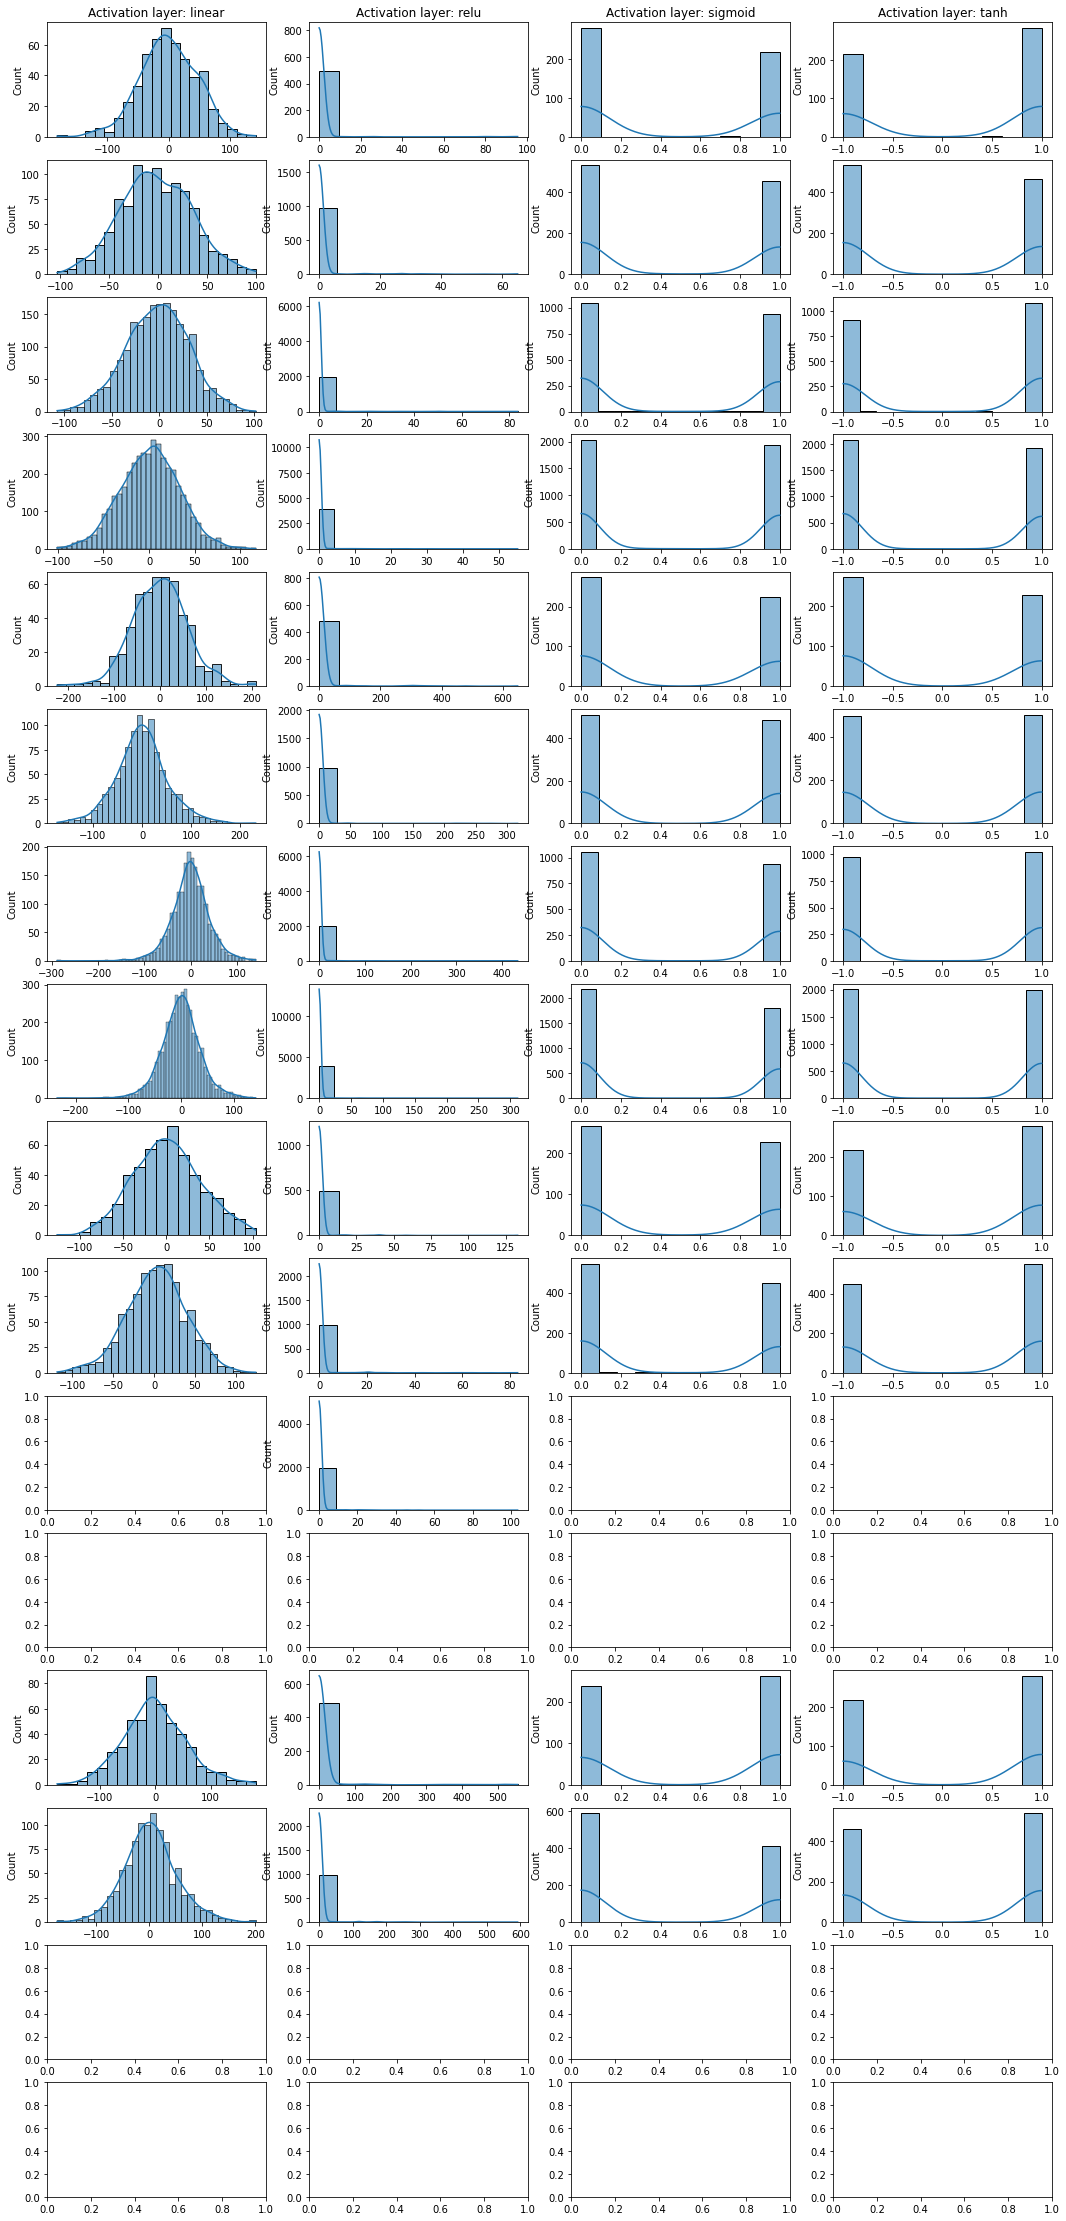

In [25]:
%%time
fig, ax = plt.subplots(16, 4, figsize=(18, 40))
null_values = np.zeros((16,4))
ones_values = np.zeros((16,4))
for i, model in enumerate(models_list):
    print(f"Model {i+1}/{len(models_list)}")
    #model = models_list[0]
    trained_model = load_model(os.path.join(path_models, model))
    layer_outputs = [trained_model.layers[-1].input]
    embedding_model = models.Model(inputs=trained_model.input, outputs=layer_outputs)
    image_embeddings = embedding_model.predict(test_dataset)
    image_embeddings.shape
    
    i_col = np.where(act_fn == log_df.loc[log_df['name'] == model, 'Last_layer_activation'].values[0])[0][0]
    i_row = (np.where(emb_size == log_df.loc[log_df['name'] == model, 'Embedding_size'].values[0])[0][0]) + 4*(np.where(DA == log_df.loc[log_df['name'] == model, 'Data_augmentation'].values[0])[0][0]) + 8*(np.where(pat == log_df.loc[log_df['name'] == model, 'patience'].values[0])[0][0])
    sns.histplot(image_embeddings.ravel(), kde=True, ax = ax[i_row][i_col])
    #ax[i_row][i_col].set_title(f"{log_df.loc[log_df['name'] == model, 'Last_layer_activation'].values[0]}_{log_df.loc[log_df['name'] == model, 'Embedding_size'].values[0]}_{log_df.loc[log_df['name'] == model, 'Data_augmentation'].values[0]}_{log_df.loc[log_df['name'] == model, 'patience'].values[0]}")
    null_values[i_row][i_col] = np.sum(image_embeddings.ravel() == 0.0)/len(image_embeddings.ravel())
    ones_values[i_row][i_col] = np.sum(np.abs(image_embeddings.ravel()) == 1.0)/len(image_embeddings.ravel())
for i in range(4):
    ax[0][i].set_title(f"Activation layer: {act_fn[i]}")

In [26]:
null_df = pd.DataFrame(null_values, columns = act_fn)
null_df

,linear,relu,sigmoid,tanh
0,0.0,0.98400,0.41000,0.0
1,0.0,0.95700,0.36500,0.0
2,0.0,0.98250,0.31450,0.0
3,0.0,0.97775,0.32550,0.0
4,0.0,0.96400,0.39600,0.0
5,0.0,0.97700,0.39100,0.0
6,0.0,0.98350,0.38600,0.0
7,0.0,0.98200,0.35325,0.0
8,0.0,0.97800,0.32200,0.0
9,0.0,0.97600,0.33100,0.0


In [27]:
ones_df = pd.DataFrame(ones_values, columns = act_fn)
ones_df

,linear,relu,sigmoid,tanh
0,0.0,0.0,0.41800,0.98200
1,0.0,0.0,0.42700,0.97700
2,0.0,0.0,0.44250,0.98650
3,0.0,0.0,0.46450,0.98175
4,0.0,0.0,0.44600,0.98600
5,0.0,0.0,0.47700,0.99200
6,0.0,0.0,0.45900,0.99150
7,0.0,0.0,0.44225,0.99275
8,0.0,0.0,0.44000,0.99200
9,0.0,0.0,0.43000,0.98200


In [34]:
null_ones_df = (null_df + ones_df)
null_ones_df

,linear,relu,sigmoid,tanh
0,0.0,0.98400,0.8280,0.98200
1,0.0,0.95700,0.7920,0.97700
2,0.0,0.98250,0.7570,0.98650
3,0.0,0.97775,0.7900,0.98175
4,0.0,0.96400,0.8420,0.98600
5,0.0,0.97700,0.8680,0.99200
6,0.0,0.98350,0.8450,0.99150
7,0.0,0.98200,0.7955,0.99275
8,0.0,0.97800,0.7620,0.99200
9,0.0,0.97600,0.7610,0.98200


In [37]:
np.max(1-null_ones_df.loc[null_ones_df['tanh']!=0])

linear     1.000
relu       0.043
sigmoid    0.243
tanh       0.023
dtype: float64